### Analysis

1. Most item bought is of type FDW13 and FDW33 and these are low fat items
2. Then, the most item bought is FDU12 and it is of Regular fat content item.
3. There are more number of outliers present in Outlet_Item_Sales wrt to the differnt item_fat_contents of type Regular fat content, and low fat content. For others, they can be effectively treated. 
4. Most of the items have item fat content belonging to the Low fat and Regular category and the least to
5. Item_fat_content is of actually two types: 'Low Fat' and 'Regular'
6. Most of the items bought are of types: 'Fruits and Vegetables' and Snack Food and the least of Breakfast and Seafood
7. Items of types: Health & Hygiene, Hard Drinks, Household, Others are available in only low fat content
7. Outlet_Indetifier are all having similar occurence and only two outlets of '010' and '019' have the least occurence.
8. Maximum number of outlets were established in the year 1985 and the least in 1998, while all the other years, almost similar number of outlets were established. 
9. Most of the Outlets established are of Medium and Small size and the least are of high
10. Most of the outlets are established in Tier 3 and the least in Tier 1 cities
11. Most of the outlets are of type Supermarket Type 1
12. There is a linear relationship between Item_MRP and Item_Outlet_Sales for both the Item_fat_content
13. Also the nature of the change in Outlet sales is similar for both the item fat content of types low fat and regular.
13. Sales are not made from an outlet chosen on the basis of outlet_establishment_year.
14. As the Item_visibility increases, the item_outlet_sales decreases, but this decrease is marginal
15. Type of outlet has a role to play in total sales given that most number of sales are recorded from the supermarket type of store and the least in grocery

#### Machine Learning Models:

1. Linear Regression Model
     - RMSE = 1149.78
     - Accuracy = 47%
     
     
2. Grid Search
     - ds 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train_big_mart_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.describe(include= 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


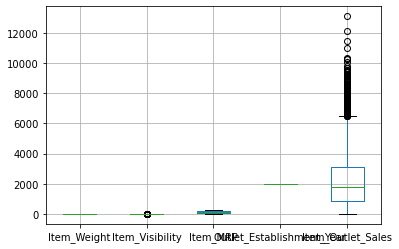

In [7]:
df.boxplot()

#### Univariate Analysis

1. Item_Identifier

In [8]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDF56     9
NCQ06     9
FDG09     9
         ..
FDC23     1
FDY43     1
FDO33     1
FDE52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [9]:
df[df['Item_Identifier'] == 'FDU12']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2993,FDU12,15.5,Regular,0.075905,Baking Goods,263.9568,OUT045,2002,NaN,Tier 2,Supermarket Type1,4745.8224
3158,FDU12,15.5,Regular,0.075751,Baking Goods,262.8568,OUT046,1997,Small,Tier 1,Supermarket Type1,5800.4496
4612,FDU12,15.5,Regular,0.126792,Baking Goods,262.1568,OUT010,1998,NaN,Tier 3,Grocery Store,527.3136
5128,FDU12,15.5,Regular,0.075869,Baking Goods,261.7568,OUT049,1999,Medium,Tier 1,Supermarket Type1,1845.5976
5177,FDU12,NaN,Regular,0.075384,Baking Goods,262.7568,OUT027,1985,Medium,Tier 3,Supermarket Type3,7646.0472
5392,FDU12,NaN,Regular,0.132630,Baking Goods,263.8568,OUT019,1985,Small,Tier 1,Grocery Store,790.9704
6893,FDU12,15.5,Regular,0.075688,Baking Goods,262.9568,OUT013,1987,High,Tier 3,Supermarket Type1,1845.5976
7085,FDU12,15.5,Regular,0.075737,Baking Goods,265.5568,OUT035,2004,Small,Tier 2,Supermarket Type1,4482.1656
7675,FDU12,15.5,Regular,0.076060,Baking Goods,265.1568,OUT018,2009,Medium,Tier 3,Supermarket Type2,2109.2544


2. Item_Wieght

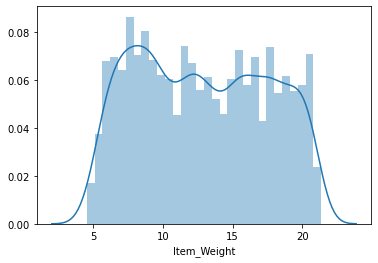

In [10]:
sns.distplot(df['Item_Weight'], bins = 30)

Clearly, this is not a normal distribution

In [11]:
#imputing missing values in Item_weight column

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace= True)

3. Item_Fat_content

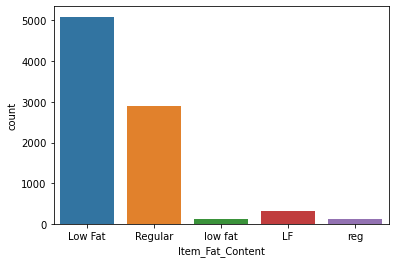

In [12]:
sns.countplot(df['Item_Fat_Content'])

We find that the items with fat content of type 'low fat' and 'LF' are actually 'Low Fat'. Similarly, item with fat content 'reg' and Regular are same. It may have been a typing error. So, we will replace the other values, so that ultimately we will be having item fat content of only 2 types: Low Fat and Regular.

In [13]:
df['Item_Fat_Content'].replace(to_replace= ['LF', 'low fat'], value = 'Low Fat', inplace =True)
df['Item_Fat_Content'].replace(to_replace= ['reg'], value = 'Regular', inplace =True)

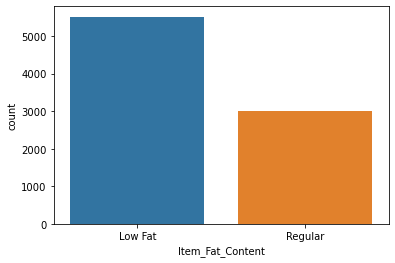

In [14]:
sns.countplot(df['Item_Fat_Content'])

4. Item_visibility

(0.06613202877895127, 0.05393093400000001)

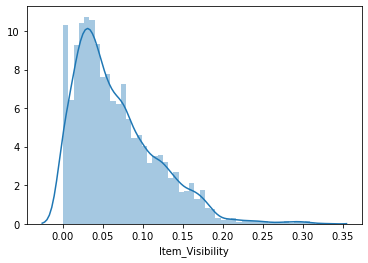

In [15]:
sns.distplot(df['Item_Visibility']);
df['Item_Visibility'].mean(), df['Item_Visibility'].median()

Clearly, the distribution is right skewed.

5. Item_type

In [16]:
# sns.countplot(y= df['Item_Type'].value_counts())
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

6. Item_MRP

(140.9927819781768, 143.0128)

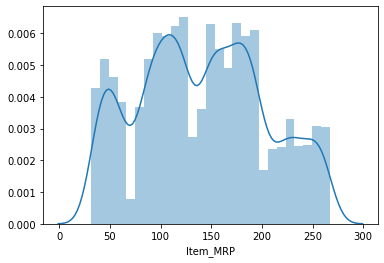

In [17]:
sns.distplot(df['Item_MRP']);
df['Item_MRP'].mean(), df['Item_MRP'].median()

Clearly, this is not a normal distribution curve

7. Outlet_Indetifier

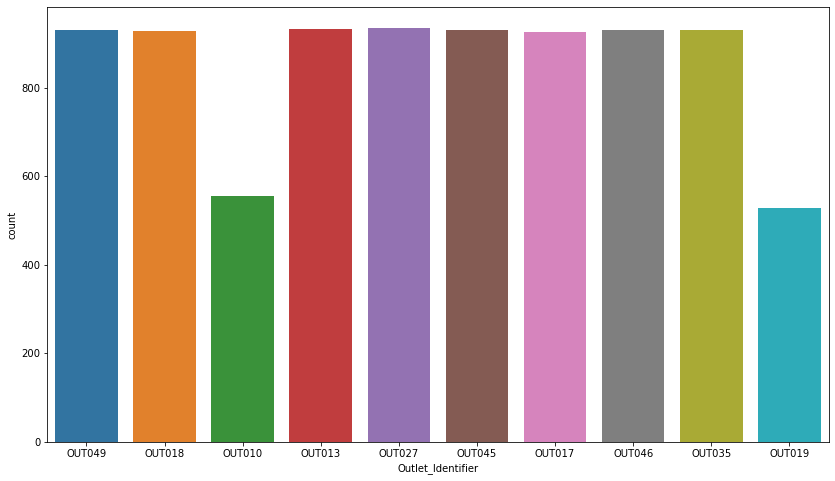

In [18]:
plt.figure(figsize= (14,8))
sns.countplot(df['Outlet_Identifier'])

8. Outlet_establishment_year

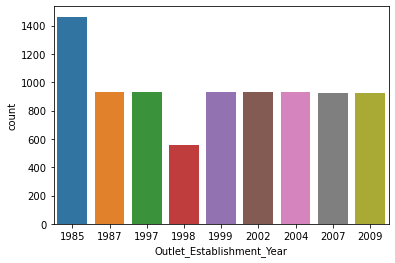

In [19]:
sns.countplot(df['Outlet_Establishment_Year'], order = df['Outlet_Establishment_Year'].value_counts().index.sort_values())

9. Outlet_Size

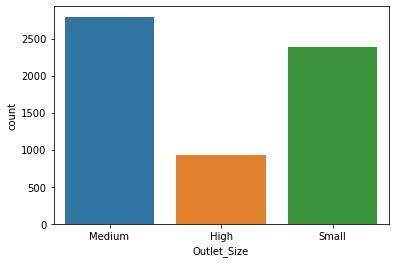

In [20]:
sns.countplot(df['Outlet_Size'])

In [21]:
df['Outlet_Size'].fillna(df['Outlet_Size'].value_counts().index[0], inplace= True)

10. Outlet Location Type

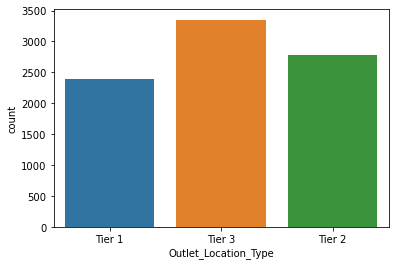

In [22]:
sns.countplot(df['Outlet_Location_Type'])

11. Outlet Type 

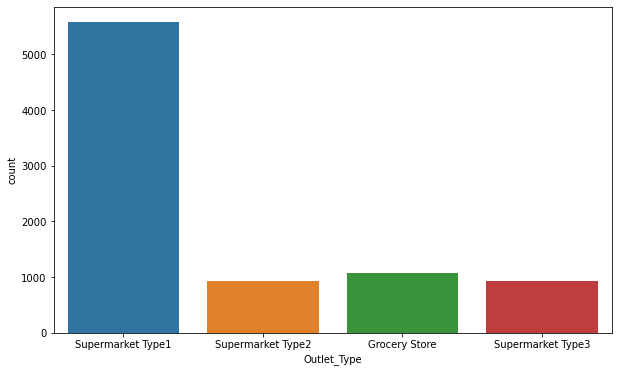

In [23]:
plt.figure(figsize= (10,6))
sns.countplot(df['Outlet_Type'])

12. Item_Outlet_Sales

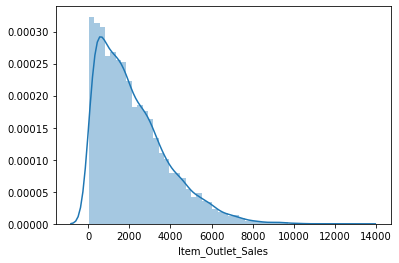

In [24]:
sns.distplot(df['Item_Outlet_Sales'])

Clearly, this is right skewed

### Outlier Treatment

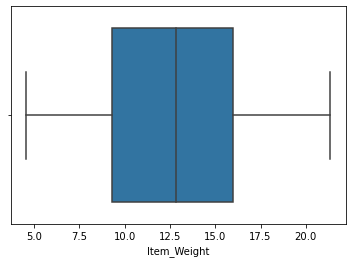

In [25]:
sns.boxplot(df['Item_Weight'])

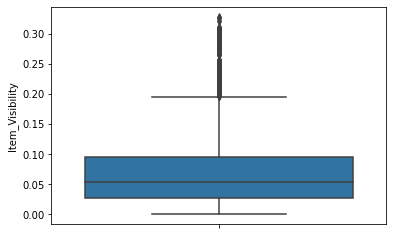

In [26]:
sns.boxplot(y= df['Item_Visibility'])

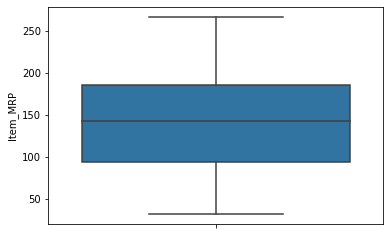

In [27]:
sns.boxplot(y= df['Item_MRP'])

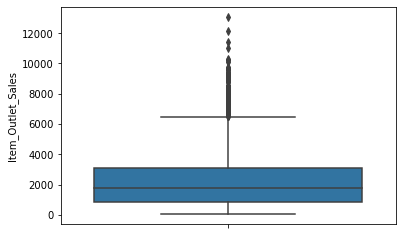

In [28]:
sns.boxplot(y= df['Item_Outlet_Sales'])

<Figure size 864x576 with 0 Axes>

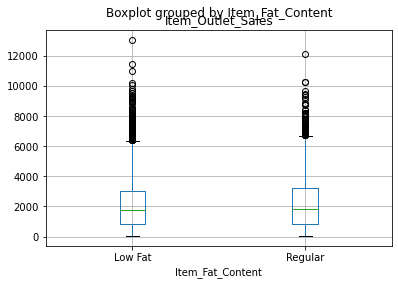

In [29]:
plt.figure(figsize= (12,8))
df.boxplot(by= 'Item_Fat_Content', column= 'Item_Outlet_Sales', grid = True)

In [30]:
# Outlier Treatment

low = np.quantile(df['Item_Outlet_Sales'], 0.01)
high = np.quantile(df['Item_Outlet_Sales'], 0.99)

df= df[(df['Item_Outlet_Sales'] > low) & (df['Item_Outlet_Sales'] < high)]


In [31]:
# Outlier Treatment for the Item Visibility feature

low = np.quantile(df['Item_Visibility'], 0.01)
high = np.quantile(df['Item_Visibility'], 0.99)

df= df[(df['Item_Visibility'] > low) & (df['Item_Visibility'] < high)]

In [32]:
df.shape

(7753, 12)

### Bivariate Analysis

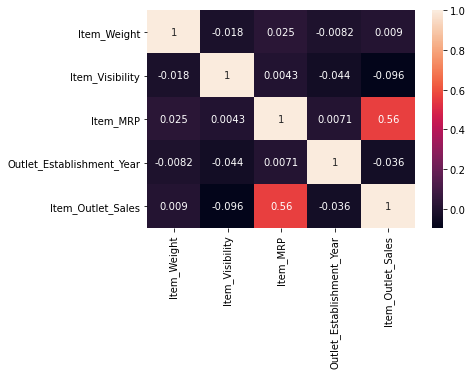

In [33]:
sns.heatmap(df.corr(), annot= True)

In [34]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
6       Regular
7       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 7753, dtype: object

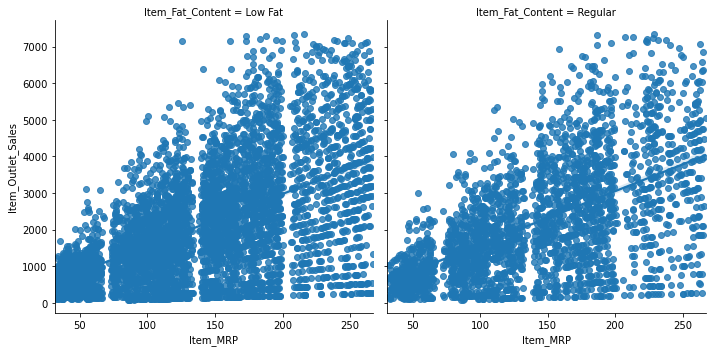

In [35]:
sns.lmplot(x= 'Item_MRP', y= 'Item_Outlet_Sales', data= df, fit_reg= True, col= 'Item_Fat_Content', legend = True)

So, there is a linear relationship between Item_MRP and Item_Outlet_Sales for both the Item_fat_content. 

Also the nature of the change in Outlet sales is similar for both the item fat content of types low fat and regular. 

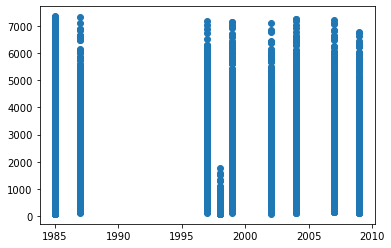

In [36]:
plt.scatter(df['Outlet_Establishment_Year'], df['Item_Outlet_Sales'])

Clearly, sales are not made from an outlet chosen on the basis of outlet_establishment_year. 

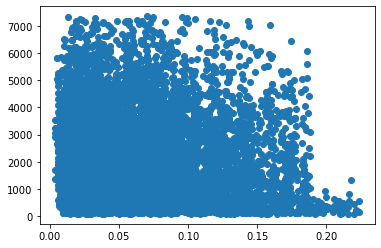

In [37]:
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])

As the Item_visibility increases, the item_outlet_sales decreases, but this decrease is marginal

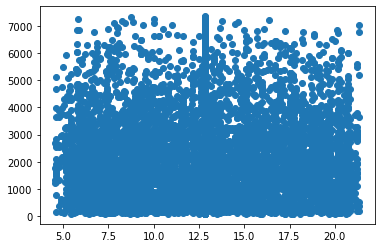

In [38]:
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])

<Figure size 432x216 with 0 Axes>

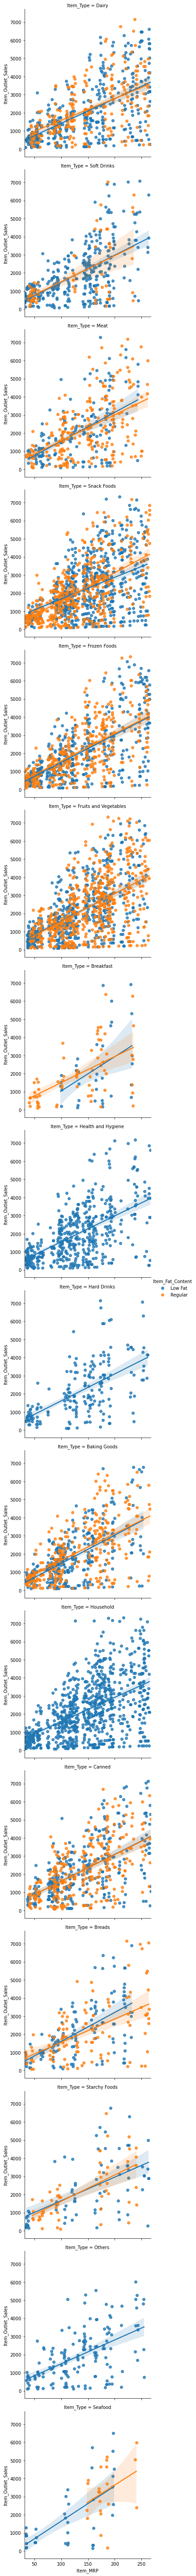

In [39]:
plt.figure(figsize= (6,3))
sns.lmplot(x= 'Item_MRP', y= 'Item_Outlet_Sales', data= df, fit_reg= True, hue= 'Item_Fat_Content', row= 'Item_Type', legend = True)

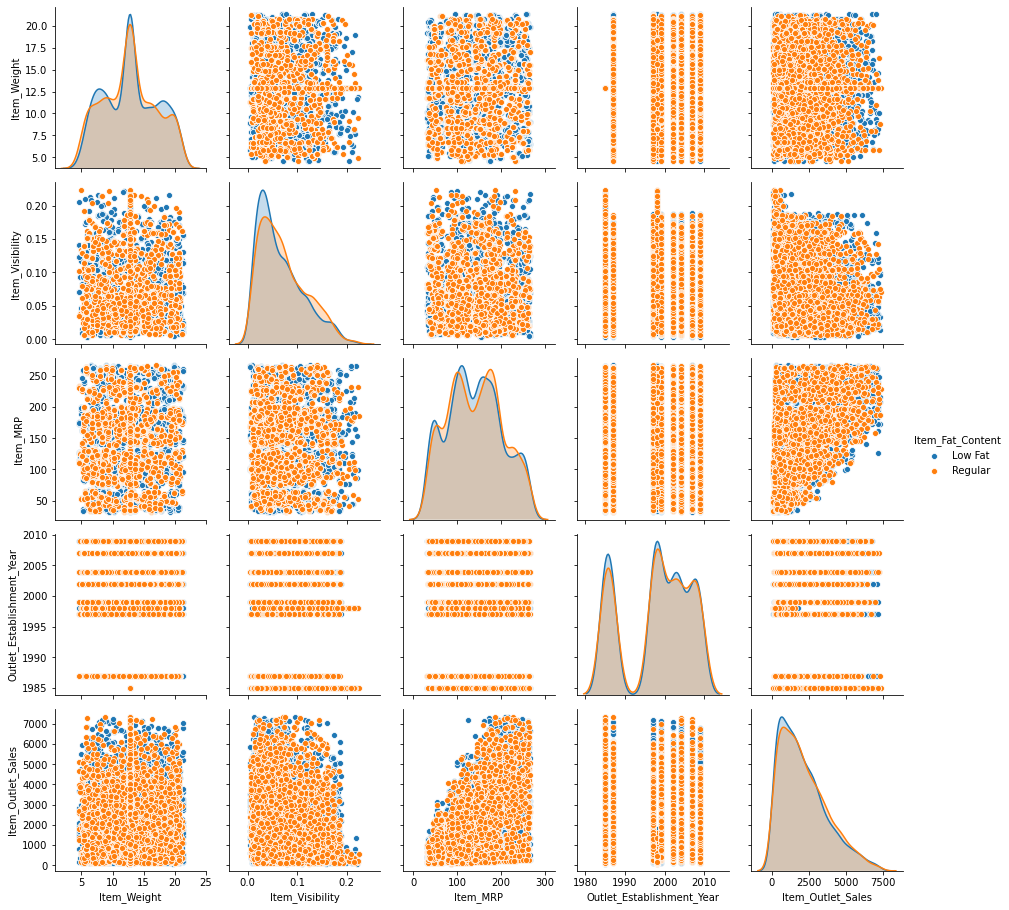

In [40]:
sns.pairplot(df, kind= 'scatter', hue= 'Item_Fat_Content')

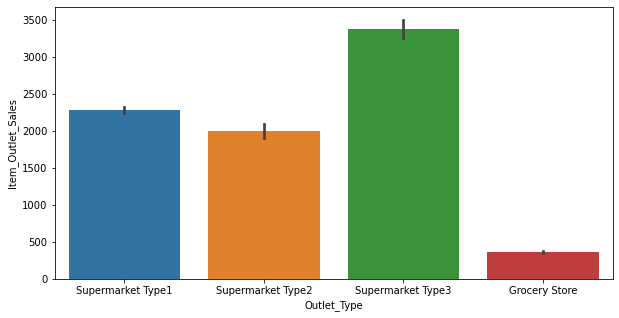

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Outlet_Type', y= 'Item_Outlet_Sales', data = df)

In [42]:
pd.crosstab(index=df['Outlet_Size'], columns=df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,868,0,0
Medium,454,2601,860,823
Small,411,1736,0,0


### Dropping irrelevant features:

In [43]:
drop_cols = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year']

df.drop(labels= drop_cols, axis= 1, inplace= True)

In [44]:
df.shape

(7753, 9)

### One Hot Encoding

In [45]:
df.select_dtypes(include= 'object')

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
6,Regular,Snack Foods,High,Tier 3,Supermarket Type1
7,Low Fat,Snack Foods,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [84]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7753 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7753 non-null   float64
 1   Item_Fat_Content      7753 non-null   object 
 2   Item_Visibility       7753 non-null   float64
 3   Item_Type             7753 non-null   object 
 4   Item_MRP              7753 non-null   float64
 5   Outlet_Size           7753 non-null   object 
 6   Outlet_Location_Type  7753 non-null   object 
 7   Outlet_Type           7753 non-null   object 
 8   Item_Outlet_Sales     7753 non-null   float64
dtypes: float64(4), object(5)
memory usage: 925.7+ KB


In [46]:
df.shape

(7753, 9)

In [47]:
cat_cols= ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [48]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

le = LabelEncoder()

In [53]:
for col in cat_cols:
    print(col)
    df[col] = le.fit_transform(df[col])

Item_Fat_Content
Item_Type
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [55]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920000,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.500000,0,0.016760,10,141.6180,1,0,1,2097.2700
6,13.650000,1,0.012741,13,57.6588,0,2,1,343.5528
7,12.857645,0,0.127470,13,107.7622,1,2,3,4022.7636


In [56]:
df.shape

(7753, 9)

## Test-Train Split

In [58]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop(columns= 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)


In [65]:
pd.DataFrame(index= X.columns, data = lm.coef_, columns= ['Coefficients'])

,Coefficients
Item_Weight,-1.213524
Item_Fat_Content,73.011204
Item_Visibility,-1251.376804
Item_Type,-1.559434
Item_MRP,15.078084
Outlet_Size,-309.260011
Outlet_Location_Type,-424.224659
Outlet_Type,943.693498


In [66]:
lm.intercept_

-189.78226198894617

#### Predictions

In [71]:
y_pred = lm.predict(X_test)

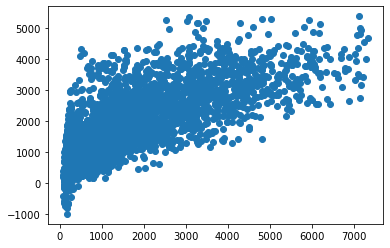

In [72]:
plt.scatter(y_test, y_pred)

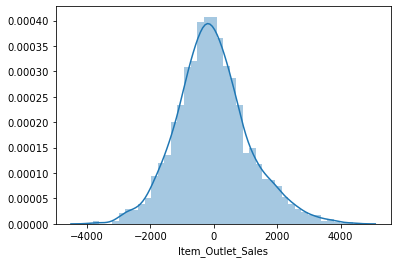

In [73]:
sns.distplot((y_test - y_pred))

Above we get a normal distribution of the difference between y_test and predictions, so this is a positive sign. The model is good

#### Linear Regression Model Performance

In [74]:
from sklearn import metrics

In [80]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("MAE = ", mae)
print("MSE = ", mse)
print("RMSE = ", rmse)

MAE =  884.8431885959495
MSE =  1322004.8196541246
RMSE =  1149.7846840405052


In [81]:
accuracy = lm.score(X_test, y_test)
print("Accuracy = ", accuracy)

Accuracy =  0.4712719460156729


#### Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [123]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920000,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.500000,0,0.016760,10,141.6180,1,0,1,2097.2700
6,13.650000,1,0.012741,13,57.6588,0,2,1,343.5528
7,12.857645,0,0.127470,13,107.7622,1,2,3,4022.7636


In [124]:
rfc  = RandomForestClassifier(n_estimators= 200)

In [125]:
rfc.fit(X_train, y_train)

ValueError: could not convert string to float: 'FDS16'

SyntaxError: invalid syntax (<ipython-input-128-e27befb8895a>, line 1)